<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r2_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r2-good.csv?token=AKVFSODJHCSL4YTM5ZKMY3C6XZY7G"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r2-mal.csv?token=AKVFSOGYF3JIWAA6UVHBLXS6XZY7K"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [0]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,15,2,4,1,1,4,3,9,0,0,23,7,0,4,2,0.500000,12,8,1,8,8,64,8,1,4,0,3,27,9,1
1,39,0,1,2,1,4,3,9,23,7,18,2,0,2,2,1.000000,12,7,2,8,14,112,0,2,8,0,6,27,18,1
2,78,2,0,3,1,4,3,9,18,2,23,7,0,2,0,0.000000,4,6,3,8,18,144,0,3,12,0,9,27,27,1
3,79,4,0,4,1,1,5,17,18,2,0,0,0,2,0,0.000000,5,5,4,8,20,160,0,4,4,0,20,85,100,1
4,80,4,0,4,2,2,5,17,18,2,0,0,0,2,0,0.000000,6,4,5,8,20,160,0,8,16,0,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36474,3251169,1,4,5,3,2,3,9,0,0,22,6,10024,3,2,0.666667,26,5,4,8,20,160,4,15,30,300720,15,27,45,1
36475,3251176,1,4,5,4,2,3,9,0,0,22,6,10024,3,2,0.666667,33,4,5,8,20,160,4,20,40,400960,15,27,45,1
36476,3251183,1,4,5,5,3,3,9,0,0,22,6,10024,3,2,0.666667,40,3,6,8,18,144,4,25,75,751800,15,27,45,1
36477,3251184,1,4,1,1,4,3,10,0,0,22,6,10025,3,2,0.666667,40,2,7,8,14,112,4,1,4,40100,3,30,9,1


In [0]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,1,3,1,0.333333,8,14,1,14,14,196,8,1,4,4,3,27,9,0
1,15,2,4,1,1,4,3,10,0,0,23,7,0,4,2,0.500000,12,13,2,14,26,364,8,1,4,0,3,30,9,0
2,35,0,1,2,1,4,3,9,23,7,18,2,1,2,2,1.000000,12,12,3,14,36,504,0,2,8,8,6,27,18,0
3,39,0,1,2,1,4,3,10,23,7,18,2,0,2,2,1.000000,12,11,4,14,44,616,0,2,8,0,6,30,18,0
4,74,2,0,3,1,4,3,9,18,2,23,7,1,2,0,0.000000,4,10,5,14,50,700,0,3,12,12,9,27,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40843,2021342,1,4,5,4,2,3,9,1,1,26,10,11078,3,1,0.333333,29,1,1,1,1,1,4,20,40,443120,15,27,45,0
40844,2021349,1,4,5,5,3,3,9,1,1,26,10,11078,3,1,0.333333,36,1,1,1,1,1,4,25,75,830850,15,27,45,0
40845,2021350,1,4,1,1,4,3,10,1,1,26,10,11079,3,1,0.333333,36,1,1,1,1,1,4,1,4,44316,3,30,9,0
40846,2021702,2,4,5,1,1,3,9,1,1,27,11,11080,4,1,0.250000,8,1,1,1,1,1,8,5,5,55400,15,27,45,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [0]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,1,1,23,7,1,3,1,0.333333,8,14,1,14,14,196,8,1,4,4,3,27,9,0
1,15,2,4,1,1,4,3,10,0,0,23,7,0,4,2,0.500000,12,13,2,14,26,364,8,1,4,0,3,30,9,0
2,15,2,4,1,1,4,3,9,0,0,23,7,0,4,2,0.500000,12,8,1,8,8,64,8,1,4,0,3,27,9,1
3,35,0,1,2,1,4,3,9,23,7,18,2,1,2,2,1.000000,12,12,3,14,36,504,0,2,8,8,6,27,18,0
4,39,0,1,2,1,4,3,10,23,7,18,2,0,2,2,1.000000,12,11,4,14,44,616,0,2,8,0,6,30,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77322,3251169,1,4,5,3,2,3,9,0,0,22,6,10024,3,2,0.666667,26,5,4,8,20,160,4,15,30,300720,15,27,45,1
77323,3251176,1,4,5,4,2,3,9,0,0,22,6,10024,3,2,0.666667,33,4,5,8,20,160,4,20,40,400960,15,27,45,1
77324,3251183,1,4,5,5,3,3,9,0,0,22,6,10024,3,2,0.666667,40,3,6,8,18,144,4,25,75,751800,15,27,45,1
77325,3251184,1,4,1,1,4,3,10,0,0,22,6,10025,3,2,0.666667,40,2,7,8,14,112,4,1,4,40100,3,30,9,1


In [0]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.044098,0.003850,0.021906,0.019749,-0.029814,-0.001657,-0.006219,-0.018601,-0.010176,0.030027,0.048041,0.839774,0.092778,0.081068,0.027105,0.044910,-0.304050,-0.304036,-0.377563,-0.276063,-0.208170,-0.019683,0.021530,0.014119,0.440902,0.019042,-0.003628,0.010486,0.414406
outport,-0.044098,1.000000,-0.433601,-0.004058,0.013541,-0.020321,0.526235,0.570262,0.270744,-0.167276,-0.543367,-0.299633,-0.040102,-0.193674,-0.737016,-0.832598,-0.435529,-0.057495,0.111819,0.033730,0.031946,0.020090,0.159788,-0.040027,-0.020382,-0.041502,0.300955,0.547464,0.486179,-0.017080
inport,0.003850,-0.433601,1.000000,-0.118298,-0.015309,0.023008,-0.553456,-0.600813,-0.881067,-0.633274,0.709603,0.647779,0.011672,0.630434,0.601884,0.354500,0.407063,-0.038239,-0.162743,-0.124791,-0.119424,-0.103251,0.681523,-0.028877,-0.033273,-0.017087,-0.428428,-0.576240,-0.578601,0.001500
cache_coherence_type,0.021906,-0.004058,-0.118298,1.000000,0.395905,-0.595700,-0.159654,-0.212794,0.186513,0.261876,-0.039099,-0.139664,0.033071,-0.087372,0.079278,0.140527,-0.176711,0.034290,-0.044942,-0.006614,0.002827,0.005103,-0.006771,0.589374,0.451507,0.338929,0.820590,-0.183362,0.400702,0.001289
flit_id,0.019749,0.013541,-0.015309,0.395905,1.000000,-0.034694,0.123699,0.063205,-0.039179,0.003251,-0.036954,-0.007731,0.020506,0.018911,0.024618,-0.002057,0.410904,-0.002433,0.040562,0.023674,0.026506,0.019429,-0.021427,0.959132,0.930404,0.691813,0.433085,0.097940,0.332111,0.006264
flit_type,-0.029814,-0.020321,0.023008,-0.595700,-0.034694,1.000000,-0.186070,-0.095046,0.058954,-0.004947,0.055541,0.011574,-0.031017,-0.028459,-0.037013,0.003073,0.419591,-0.064905,0.092165,0.016926,-0.001512,-0.002064,0.032208,-0.135456,0.113796,0.078566,-0.651610,-0.147311,-0.499661,-0.009416
vnet,-0.001657,0.526235,-0.553456,-0.159654,0.123699,-0.186070,1.000000,0.972330,0.319476,0.016394,-0.810675,-0.372636,-0.015922,-0.281052,-0.599092,-0.563171,-0.497912,0.006638,0.122096,0.079931,0.069404,0.055570,-0.398586,-0.030950,-0.040933,-0.040897,0.433175,0.992017,0.840482,0.004165
vc,-0.006219,0.570262,-0.600813,-0.212794,0.063205,-0.095046,0.972330,1.000000,0.350608,0.021624,-0.821487,-0.391119,-0.017417,-0.311630,-0.651087,-0.613593,-0.493081,0.007164,0.140844,0.091899,0.080011,0.064711,-0.422107,-0.091076,-0.079132,-0.070569,0.368638,0.993111,0.785634,-0.001512
src_ni,-0.018601,0.270744,-0.881067,0.186513,-0.039179,0.058954,0.319476,0.350608,1.000000,0.829827,-0.590775,-0.691804,-0.015291,-0.664279,-0.422827,-0.054372,-0.307048,0.031294,0.144611,0.109220,0.104871,0.093928,-0.533908,0.032204,0.045881,0.026348,0.355249,0.334275,0.398883,-0.019239
src_router,-0.010176,-0.167276,-0.633274,0.261876,0.003251,-0.004947,0.016394,0.021624,0.829827,1.000000,-0.276352,-0.495586,0.011850,-0.505515,-0.054322,0.349684,-0.018081,0.078859,0.103916,0.113486,0.110492,0.102414,-0.455748,0.116882,0.099751,0.081329,0.248589,0.018730,0.158954,-0.051047


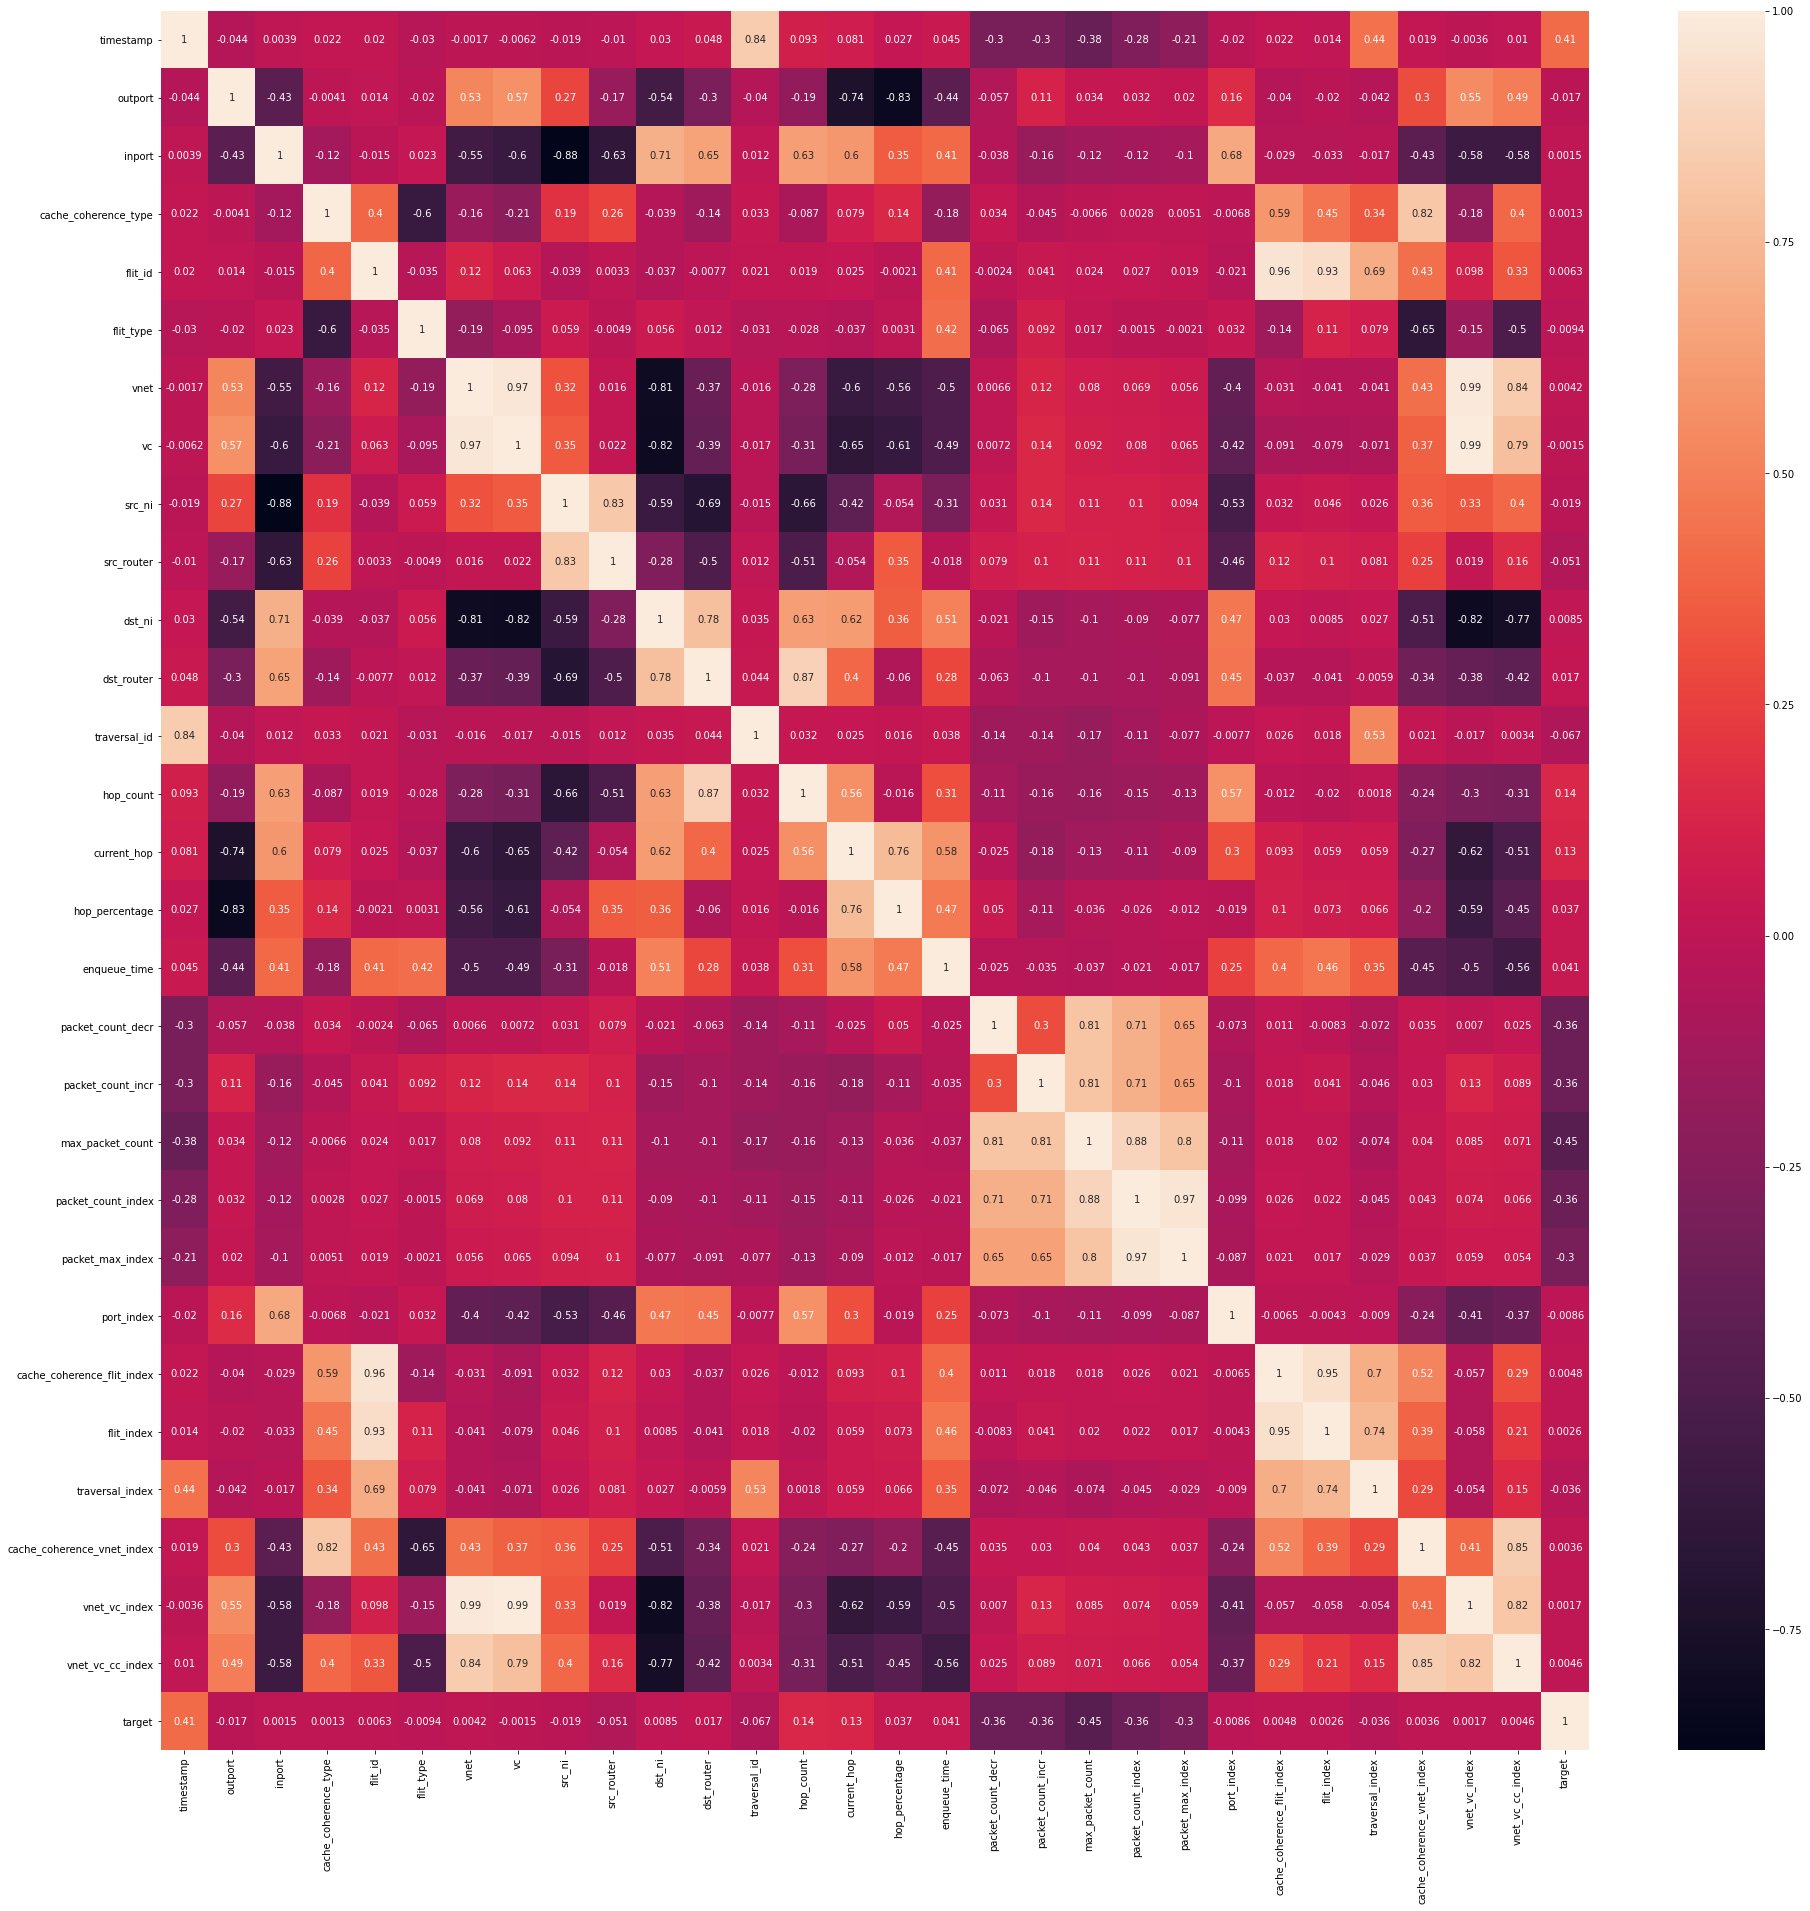

In [0]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,23,7,1,3,1,0.333333,8,14,1,14,14,196,8,1,4,4,3,27,9
1,2,4,1,1,4,3,10,23,7,0,4,2,0.500000,12,13,2,14,26,364,8,1,4,0,3,30,9
2,2,4,1,1,4,3,9,23,7,0,4,2,0.500000,12,8,1,8,8,64,8,1,4,0,3,27,9
3,0,1,2,1,4,3,9,18,2,1,2,2,1.000000,12,12,3,14,36,504,0,2,8,8,6,27,18
4,0,1,2,1,4,3,10,18,2,0,2,2,1.000000,12,11,4,14,44,616,0,2,8,0,6,30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77322,1,4,5,3,2,3,9,22,6,10024,3,2,0.666667,26,5,4,8,20,160,4,15,30,300720,15,27,45
77323,1,4,5,4,2,3,9,22,6,10024,3,2,0.666667,33,4,5,8,20,160,4,20,40,400960,15,27,45
77324,1,4,5,5,3,3,9,22,6,10024,3,2,0.666667,40,3,6,8,18,144,4,25,75,751800,15,27,45
77325,1,4,1,1,4,3,10,22,6,10025,3,2,0.666667,40,2,7,8,14,112,4,1,4,40100,3,30,9


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000090,0.4,0.333333,0.333333,0.058824,0.500000,0.000000,0.500000,0.066667,0.036855,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.50,1.00,0.000000,0.00,1.000000,0.0,0.090909,0.741935,0.466667,0.000000,0.6,0.666667,0.500000,0.117647,0.461538,0.038462,0.500000,0.128205,0.068607,1.0,0.000000,0.000000,0.000000,0.000000,0.041096,0.000000
2,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.6,0.666667,0.500000,0.117647,0.269231,0.000000,0.269231,0.035897,0.011907,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.00,0.25,0.166667,0.00,1.000000,0.0,0.000000,0.580645,0.133333,0.000090,0.2,0.666667,1.000000,0.117647,0.423077,0.076923,0.500000,0.179487,0.095067,0.0,0.034483,0.046512,0.000008,0.166667,0.000000,0.098901
4,0.00,0.25,0.166667,0.00,1.000000,0.0,0.090909,0.580645,0.133333,0.000000,0.2,0.666667,1.000000,0.117647,0.384615,0.115385,0.500000,0.220513,0.116235,0.0,0.034483,0.046512,0.000000,0.166667,0.041096,0.098901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77322,0.25,1.00,0.666667,0.50,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,0.4,0.666667,0.666667,0.323529,0.153846,0.115385,0.269231,0.097436,0.030051,0.5,0.482759,0.302326,0.301728,0.666667,0.000000,0.395604
77323,0.25,1.00,0.666667,0.75,0.333333,0.0,0.000000,0.709677,0.400000,0.904693,0.4,0.666667,0.666667,0.426471,0.115385,0.153846,0.269231,0.097436,0.030051,0.5,0.655172,0.418605,0.402304,0.666667,0.000000,0.395604
77324,0.25,1.00,0.666667,1.00,0.666667,0.0,0.000000,0.709677,0.400000,0.904693,0.4,0.666667,0.666667,0.529412,0.076923,0.192308,0.269231,0.087179,0.027027,0.5,0.827586,0.825581,0.754319,0.666667,0.000000,0.395604
77325,0.25,1.00,0.000000,0.00,1.000000,0.0,0.090909,0.709677,0.400000,0.904783,0.4,0.666667,0.666667,0.529412,0.038462,0.230769,0.269231,0.066667,0.020979,0.5,0.000000,0.000000,0.040234,0.000000,0.041096,0.000000


In [0]:
train_X[train_X.duplicated()].shape

(351, 26)

In [0]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.433601,-0.004058,0.013541,-0.020321,0.526235,0.570262,-0.543367,-0.299633,-0.040102,-0.193674,-0.737016,-0.832598,-0.435529,-0.057495,0.111819,0.033730,0.031946,0.020090,0.159788,-0.040027,-0.020382,-0.041502,0.300955,0.547464,0.486179,-0.017080
inport,-0.433601,1.000000,-0.118298,-0.015309,0.023008,-0.553456,-0.600813,0.709603,0.647779,0.011672,0.630434,0.601884,0.354500,0.407063,-0.038239,-0.162743,-0.124791,-0.119424,-0.103251,0.681523,-0.028877,-0.033273,-0.017087,-0.428428,-0.576240,-0.578601,0.001500
cache_coherence_type,-0.004058,-0.118298,1.000000,0.395905,-0.595700,-0.159654,-0.212794,-0.039099,-0.139664,0.033071,-0.087372,0.079278,0.140527,-0.176711,0.034290,-0.044942,-0.006614,0.002827,0.005103,-0.006771,0.589374,0.451507,0.338929,0.820590,-0.183362,0.400702,0.001289
flit_id,0.013541,-0.015309,0.395905,1.000000,-0.034694,0.123699,0.063205,-0.036954,-0.007731,0.020506,0.018911,0.024618,-0.002057,0.410904,-0.002433,0.040562,0.023674,0.026506,0.019429,-0.021427,0.959132,0.930404,0.691813,0.433085,0.097940,0.332111,0.006264
flit_type,-0.020321,0.023008,-0.595700,-0.034694,1.000000,-0.186070,-0.095046,0.055541,0.011574,-0.031017,-0.028459,-0.037013,0.003073,0.419591,-0.064905,0.092165,0.016926,-0.001512,-0.002064,0.032208,-0.135456,0.113796,0.078566,-0.651610,-0.147311,-0.499661,-0.009416
vnet,0.526235,-0.553456,-0.159654,0.123699,-0.186070,1.000000,0.972330,-0.810675,-0.372636,-0.015922,-0.281052,-0.599092,-0.563171,-0.497912,0.006638,0.122096,0.079931,0.069404,0.055570,-0.398586,-0.030950,-0.040933,-0.040897,0.433175,0.992017,0.840482,0.004165
vc,0.570262,-0.600813,-0.212794,0.063205,-0.095046,0.972330,1.000000,-0.821487,-0.391119,-0.017417,-0.311630,-0.651087,-0.613593,-0.493081,0.007164,0.140844,0.091899,0.080011,0.064711,-0.422107,-0.091076,-0.079132,-0.070569,0.368638,0.993111,0.785634,-0.001512
dst_ni,-0.543367,0.709603,-0.039099,-0.036954,0.055541,-0.810675,-0.821487,1.000000,0.783518,0.035196,0.631907,0.618913,0.361377,0.507682,-0.021353,-0.145946,-0.103876,-0.089572,-0.077361,0.466921,0.029988,0.008489,0.026986,-0.505033,-0.818650,-0.773859,0.008537
dst_router,-0.299633,0.647779,-0.139664,-0.007731,0.011574,-0.372636,-0.391119,0.783518,1.000000,0.043941,0.873367,0.399983,-0.060330,0.275326,-0.063015,-0.104564,-0.104051,-0.100595,-0.091397,0.449721,-0.036687,-0.040569,-0.005867,-0.343251,-0.382193,-0.422507,0.017106
traversal_id,-0.040102,0.011672,0.033071,0.020506,-0.031017,-0.015922,-0.017417,0.035196,0.043941,1.000000,0.031742,0.025462,0.015927,0.037599,-0.136451,-0.136368,-0.169394,-0.113466,-0.077290,-0.007714,0.026245,0.018225,0.525473,0.020976,-0.016617,0.003374,-0.066502


Principal Component Analysis

In [0]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.78280868, -1.13282974, -0.29024068, ...,  0.04170911,
        -0.00451017, -0.17900485],
       [-0.90510231, -1.07909077, -0.24473694, ..., -0.07174305,
         0.00533193,  0.12605706],
       [-0.95655768, -1.07280154, -0.25183715, ..., -0.14801427,
        -0.18778832,  0.09675167],
       ...,
       [-0.6223612 ,  0.99585457, -0.1337395 , ..., -0.08669059,
         0.4948901 , -0.09612333],
       [-0.88346096, -0.89845303,  0.28337973, ..., -0.21735002,
         0.46176657, -0.00162554],
       [-0.00151708, -0.0657907 ,  0.9851006 , ...,  0.09393127,
         0.40759329, -0.0887776 ]])

In [0]:
pca.explained_variance_ratio_

array([0.37860528, 0.16941841, 0.13604488, 0.08262099, 0.06315962,
       0.04414365, 0.04115154, 0.03173611, 0.01877275])

Text(0, 0.5, 'Variance')

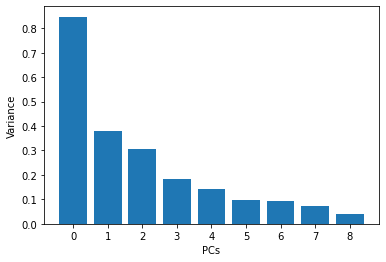

In [0]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [0]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6,7,8
0,-0.782809,-1.132830,-0.290241,0.535077,0.050222,0.619937,0.041709,-0.004510,-0.179005
1,-0.905102,-1.079091,-0.244737,0.474032,-0.115554,0.681864,-0.071743,0.005332,0.126057
2,-0.956558,-1.072802,-0.251837,0.458684,-0.098690,0.462613,-0.148014,-0.187788,0.096752
3,-0.398812,-0.677461,1.145003,0.441215,-0.019659,0.571246,0.075815,-0.077095,0.231993
4,-0.357007,-0.686032,1.135207,0.446645,-0.057153,0.592350,0.064463,-0.061073,0.240335
...,...,...,...,...,...,...,...,...,...
77322,-0.606968,0.275948,0.017933,-0.184731,-0.171426,-0.107182,-0.041621,0.470966,-0.108654
77323,-0.605280,0.572336,-0.050058,-0.040199,-0.212606,-0.103422,-0.046792,0.469061,-0.127970
77324,-0.622361,0.995855,-0.133739,0.436079,-0.248426,-0.156385,-0.086691,0.494890,-0.096123
77325,-0.883461,-0.898453,0.283380,0.564706,-0.358227,-0.087262,-0.217350,0.461767,-0.001626


In [0]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000e+00,1.062637e-16,-4.630458e-16,-1.019387e-16,1.015399e-17,3.280962e-16,-1.597428e-16,-1.438166e-17,-7.632800e-16,-0.029411
1,1.062637e-16,1.000000e+00,3.327990e-16,-1.337687e-15,5.191556e-16,9.062907e-19,1.015287e-16,-1.756420e-16,1.638485e-16,0.012577
2,-4.630458e-16,3.327990e-16,1.000000e+00,-1.327497e-16,2.446279e-16,1.111342e-16,-1.493809e-15,1.495472e-16,1.117170e-15,-0.005522
3,-1.019387e-16,-1.337687e-15,-1.327497e-16,1.000000e+00,1.332264e-16,5.173474e-17,4.155151e-17,1.787605e-17,-2.711778e-16,-0.044808
4,1.015399e-17,5.191556e-16,2.446279e-16,1.332264e-16,1.000000e+00,-5.746887e-16,2.108931e-16,-4.287600e-16,-6.691293e-16,-0.092027
5,3.280962e-16,9.062907e-19,1.111342e-16,5.173474e-17,-5.746887e-16,1.000000e+00,-3.236345e-16,-4.549125e-16,6.925045e-16,-0.241741
6,-1.597428e-16,1.015287e-16,-1.493809e-15,4.155151e-17,2.108931e-16,-3.236345e-16,1.000000e+00,1.844755e-16,-2.610478e-16,-0.138776
7,-1.438166e-17,-1.756420e-16,1.495472e-16,1.787605e-17,-4.287600e-16,-4.549125e-16,1.844755e-16,1.000000e+00,-1.889108e-16,-0.373230
8,-7.632800e-16,1.638485e-16,1.117170e-15,-2.711778e-16,-6.691293e-16,6.925045e-16,-2.610478e-16,-1.889108e-16,1.000000e+00,0.123661
target,-2.941114e-02,1.257683e-02,-5.521689e-03,-4.480761e-02,-9.202747e-02,-2.417406e-01,-1.387764e-01,-3.732299e-01,1.236608e-01,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

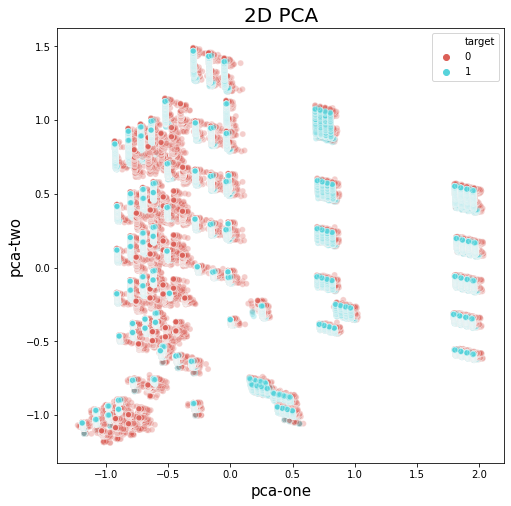

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

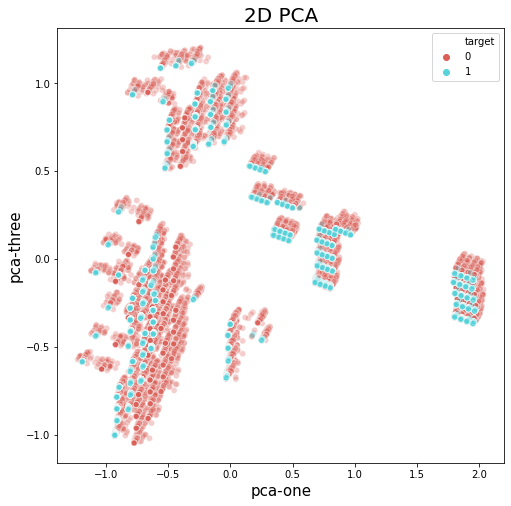

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

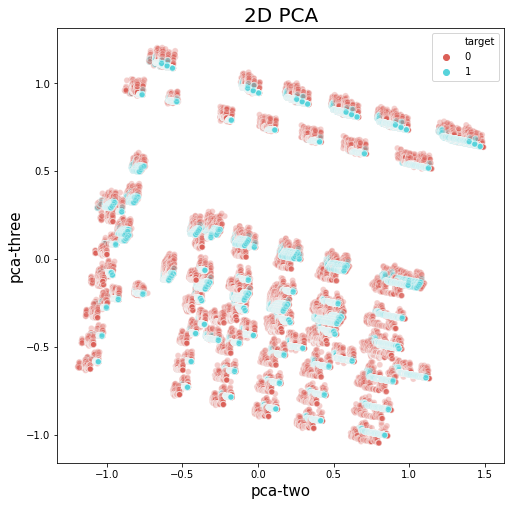

In [0]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

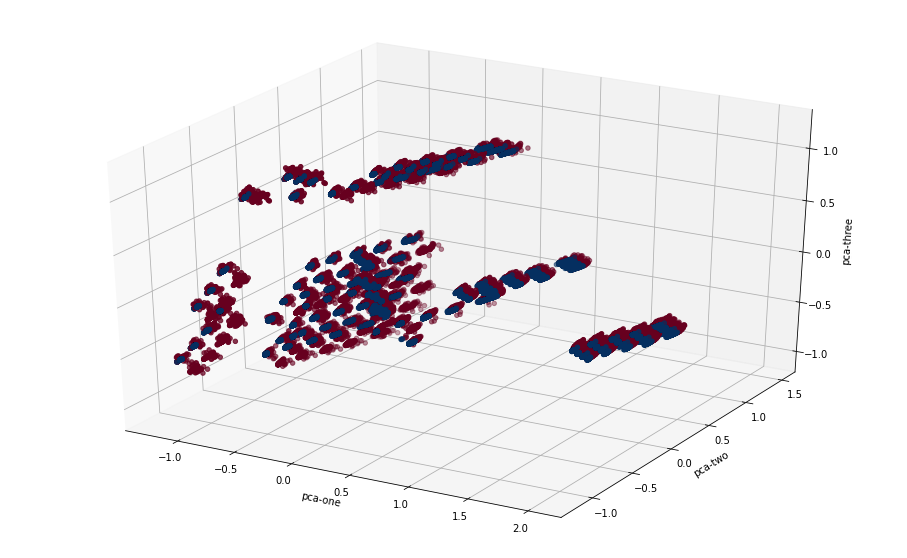

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

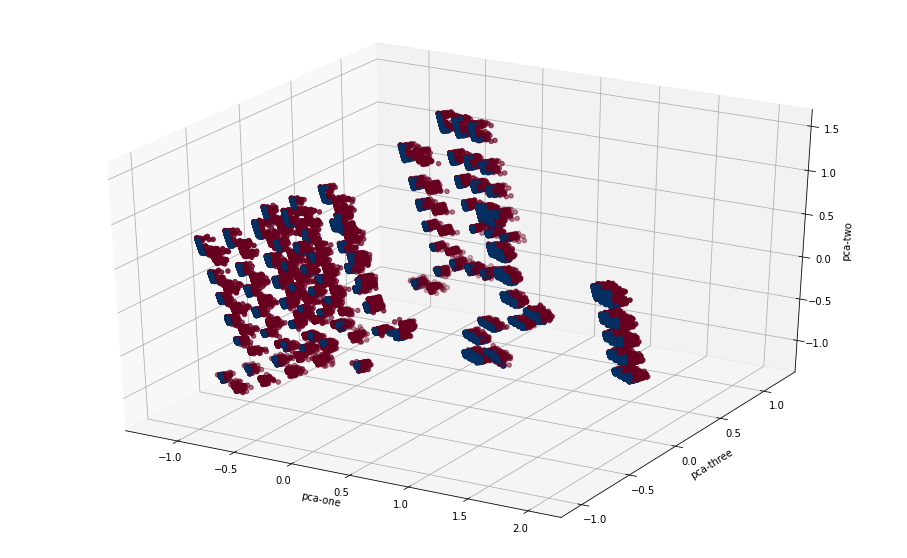

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

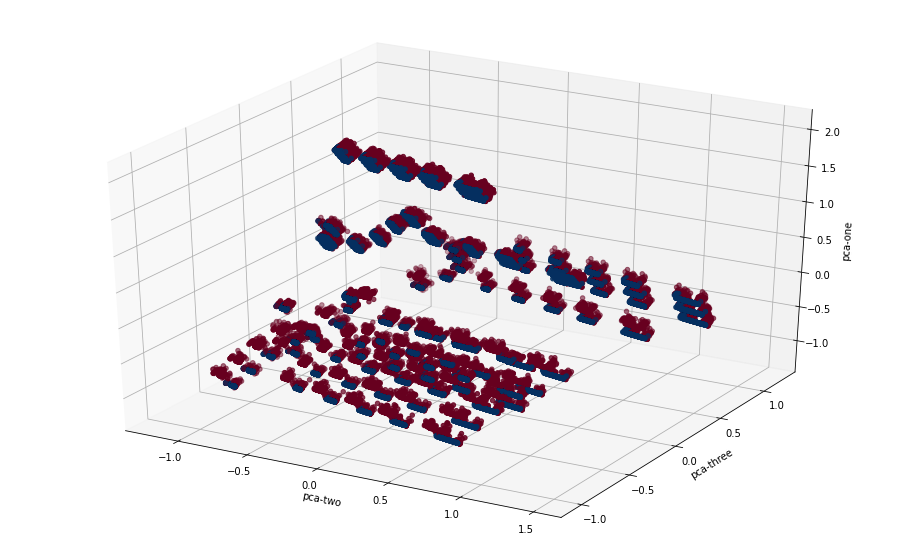

In [0]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 434.93178248405457 seconds


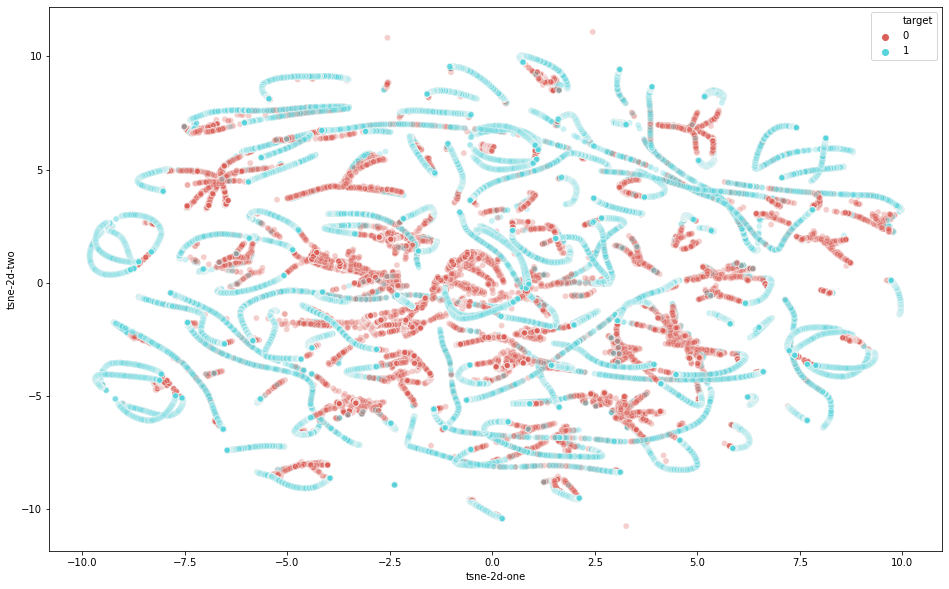

In [0]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

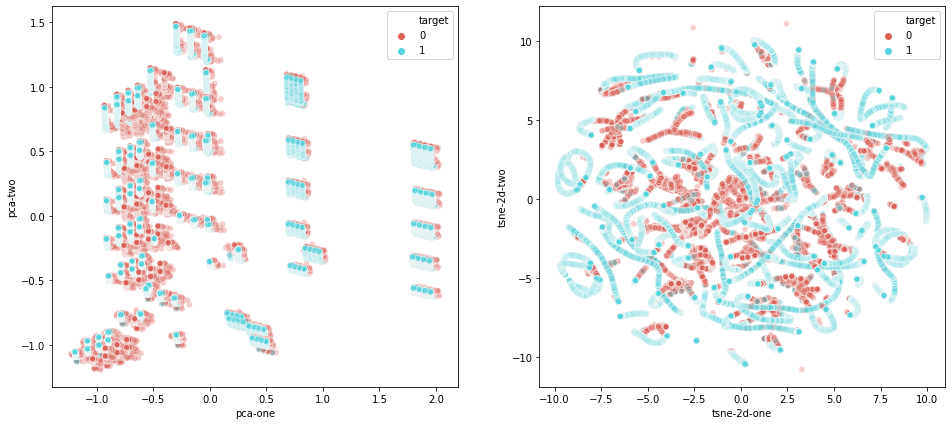

In [0]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [0]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 283.51238560676575 seconds


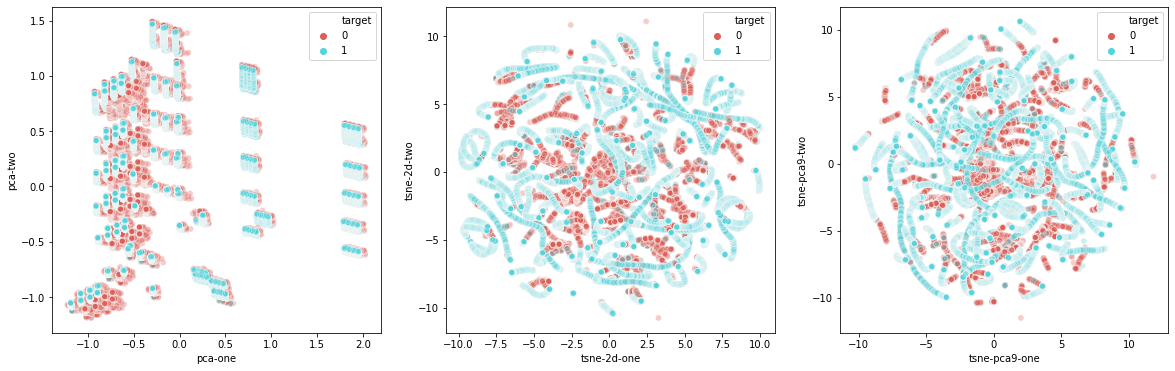

In [0]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    40848
1    36479
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs        Score
16    max_packet_count  4336.641750
14   packet_count_decr  2171.011972
15   packet_count_incr  2165.638763
17  packet_count_index  1971.535439
18    packet_max_index  1306.291292
10           hop_count   264.396878
11         current_hop   229.881634
9         traversal_id    45.141354
12      hop_percentage    23.046021
22     traversal_index    14.712478
13        enqueue_time    11.793452
8           dst_router     6.261060
0              outport     5.275171
19          port_index     2.885647
4            flit_type     2.704691
5                 vnet     1.661273
3              flit_id     1.086750


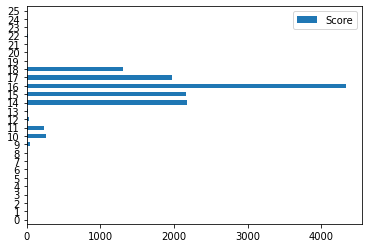

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.502493
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                       Results: Logit
Model:                       Logit                     Pseudo R-squared:          0.273     
Dependent Variable:          target                    AIC:                       77758.5073
Date:                        2020-05-08 10:56          BIC:                       77971.3907
No. Observations:            77327                     Log-Likelihood:            -38856.   
Df Model:                    22                        LL-Null:                   -53476.   
Df Residuals:                77304                     LLR p-value:               0.0000    
Converged:                   0.0000                    Scale:                     1.0000    
No. Iterations:              35.0000                                                        
--------------------------------------------------------------------------------------------
                            Coef.    Std.Err.      z     P>|z|      [0.025         0.975]   
----------------

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 75.80866781978953
Test Prediction  75.55929134876503


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
10,hop_count,9.258149
7,dst_ni,5.084097
17,packet_count_index,2.530116
5,vnet,1.263264
25,vnet_vc_cc_index,0.956175
4,flit_type,0.929644
6,vc,0.912968
23,cache_coherence_vnet_index,0.675581
13,enqueue_time,0.384500
18,packet_max_index,0.354093


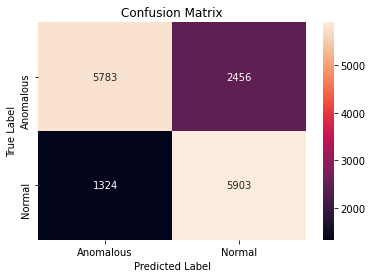

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      8239
           1       0.71      0.82      0.76      7227

    accuracy                           0.76     15466
   macro avg       0.76      0.76      0.76     15466
weighted avg       0.76      0.76      0.76     15466



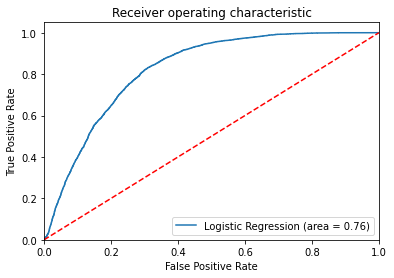

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 87.75157207287305
Test Prediction  82.4453640243114


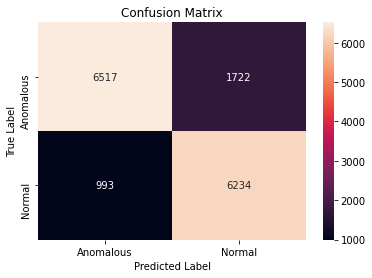

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8239
           1       0.78      0.86      0.82      7227

    accuracy                           0.82     15466
   macro avg       0.83      0.83      0.82     15466
weighted avg       0.83      0.82      0.82     15466



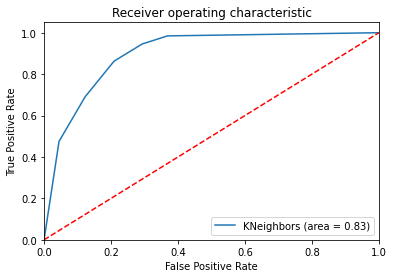

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 67.34776353437546
Test Prediction Score 67.09556446398551


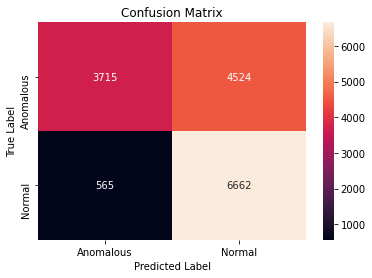

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      0.45      0.59      8239
           1       0.60      0.92      0.72      7227

    accuracy                           0.67     15466
   macro avg       0.73      0.69      0.66     15466
weighted avg       0.74      0.67      0.65     15466



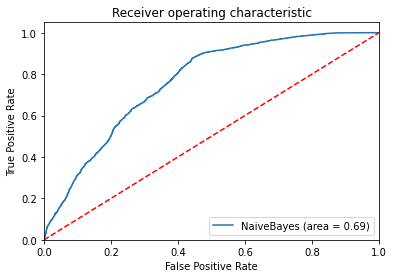

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 49488 samples, validate on 12373 samples
Epoch 1/10
49488/49488 [==============================] - 2s 42us/step - loss: 0.2099 - accuracy: 0.6635 - val_loss: 0.1846 - val_accuracy: 0.7330
Epoch 2/10
49488/49488 [==============================] - 2s 39us/step - loss: 0.1788 - accuracy: 0.7486 - val_loss: 0.1748 - val_accuracy: 0.7531
Epoch 3/10
49488/49488 [==============================] - 2s 38us/step - loss: 0.1723 - accuracy: 0.7569 - val_loss: 0.1710 - val_accuracy: 0.7551
Epoch 4/10
49488/49488 [==============================] - 2s 37us/step - loss: 0.1696 - accuracy: 0.7582 - val_loss: 0.1695 - val_accuracy: 0.7570
Epoch 5/10
49488/49488 [==============================] - 2s 37us/step - loss: 0.1681 - accuracy: 0.7597 - val_loss: 0.1686 - val_accuracy: 0.7541
Epoch 6/10
49488/49488 [==============================] - 2s 37us/step - loss: 0.1672 - accuracy: 0.7588 - val_loss: 0.1681 - val_accuracy: 0.7587
Epoch 7/10
49488/49488 [==============================] - 2s 37us/st

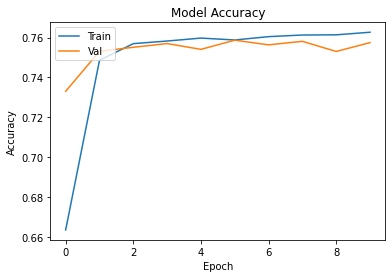

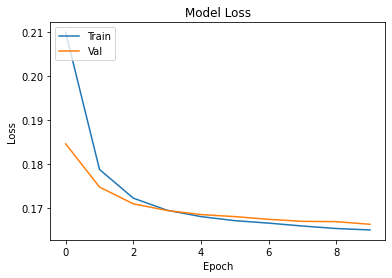

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.54%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 49488 samples, validate on 12373 samples
Epoch 1/15
49488/49488 [==============================] - 2s 37us/step - loss: 0.2508 - accuracy: 0.5266 - val_loss: 0.2501 - val_accuracy: 0.5291
Epoch 2/15
49488/49488 [==============================] - 2s 38us/step - loss: 0.2499 - accuracy: 0.5266 - val_loss: 0.2494 - val_accuracy: 0.5291
Epoch 3/15
49488/49488 [==============================] - 2s 36us/step - loss: 0.2494 - accuracy: 0.5266 - val_loss: 0.2492 - val_accuracy: 0.5291
Epoch 4/15
49488/49488 [==============================] - 2s 36us/step - loss: 0.2493 - accuracy: 0.5266 - val_loss: 0.2492 - val_accuracy: 0.5291
Epoch 5/15
49488/49488 [==============================] - 2s 36us/step - loss: 0.2493 - accuracy: 0.5266 - val_loss: 0.2492 - val_accuracy: 0.5291
Epoch 6/15
49488/49488 [==============================] - 2s 36us/step - loss: 0.2493 - accuracy: 0.5266 - val_loss: 0.2492 - val_accuracy: 0.5291
Epoch 7/15
49488/49488 [==============================] - 2s 36us/st

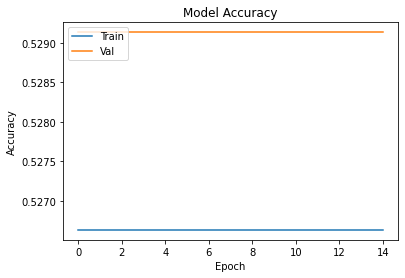

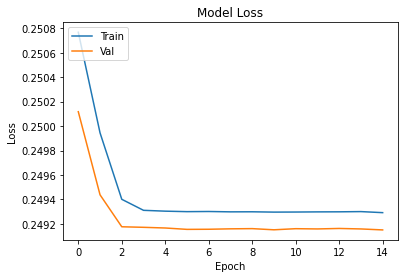

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 53.27%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 49488 samples, validate on 12373 samples
Epoch 1/30
49488/49488 [==============================] - 2s 39us/step - loss: 0.2492 - accuracy: 0.5248 - val_loss: 0.2467 - val_accuracy: 0.5434
Epoch 2/30
49488/49488 [==============================] - 2s 36us/step - loss: 0.2452 - accuracy: 0.5510 - val_loss: 0.2429 - val_accuracy: 0.5882
Epoch 3/30
49488/49488 [==============================] - 2s 37us/step - loss: 0.2397 - accuracy: 0.6252 - val_loss: 0.2347 - val_accuracy: 0.6819
Epoch 4/30
49488/49488 [==============================] - 2s 37us/step - loss: 0.2279 - accuracy: 0.7084 - val_loss: 0.2187 - val_accuracy: 0.7239
Epoch 5/30
49488/49488 [==============================] - 2s 37us/step - loss: 0.2098 - accuracy: 0.7363 - val_loss: 0.2001 - val_accuracy: 0.7403
Epoch 6/30
49488/49488 [==============================] - 2s 37us/step - loss: 0.1936 - accuracy: 0.7455 - val_loss: 0.1879 - val_accuracy: 0.7498
Epoch 7/30
49488/49488 [==============================] - 2s 36us/st

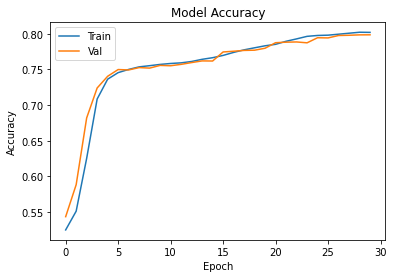

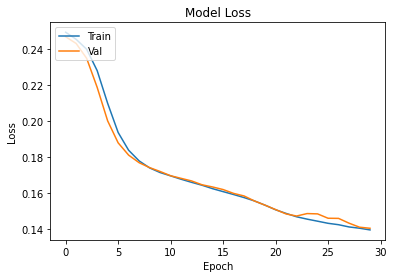

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.85%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 49488 samples, validate on 12373 samples
Epoch 1/100
49488/49488 [==============================] - 4s 82us/step - loss: 0.1637 - accuracy: 0.7587 - val_loss: 0.1405 - val_accuracy: 0.7966
Epoch 2/100
49488/49488 [==============================] - 3s 67us/step - loss: 0.1418 - accuracy: 0.7949 - val_loss: 0.1306 - val_accuracy: 0.8071
Epoch 3/100
49488/49488 [==============================] - 3s 66us/step - loss: 0.1372 - accuracy: 0.7993 - val_loss: 0.1362 - val_accuracy: 0.7964
Epoch 4/100
49488/49488 [==============================] - 3s 69us/step - loss: 0.1345 - accuracy: 0.8033 - val_loss: 0.1264 - val_accuracy: 0.8148
Epoch 5/100
49488/49488 [==============================] - 3s 67us/step - loss: 0.1320 - accuracy: 0.8068 - val_loss: 0.1376 - val_accuracy: 0.7843
Epoch 6/100
49488/49488 [==============================] - 3s 70us/step - loss: 0.1304 - accuracy: 0.8067 - val_loss: 0.1220 - val_accuracy: 0.8206
Epoch 7/100
49488/49488 [==============================] - 3s 

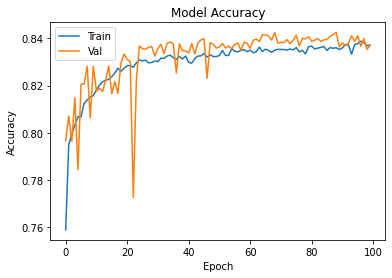

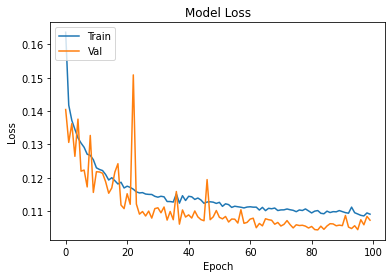

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.96%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8935840558357785


In [0]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.61400559318471
Test Prediction Score 92.81650071123755


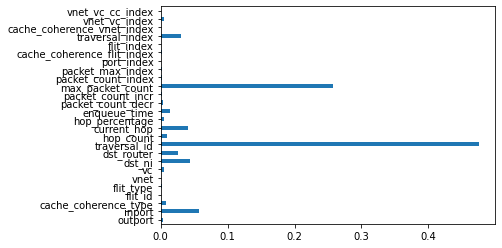

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

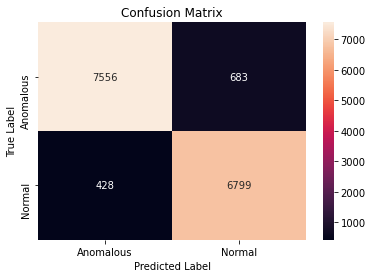

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      8239
           1       0.91      0.94      0.92      7227

    accuracy                           0.93     15466
   macro avg       0.93      0.93      0.93     15466
weighted avg       0.93      0.93      0.93     15466



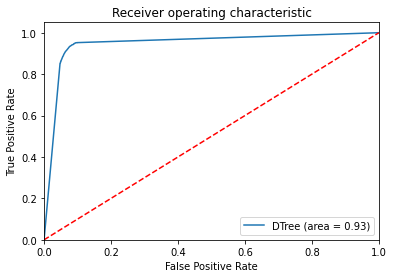

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250],
            'max_features':range(0,25,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

In [0]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.19335283943033
Test Prediction Score 93.04280356911936


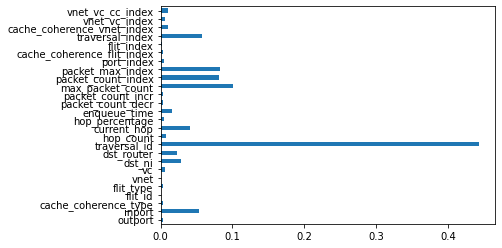

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

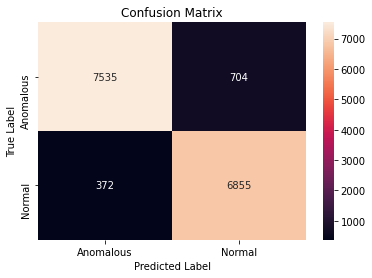

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8239
           1       0.91      0.95      0.93      7227

    accuracy                           0.93     15466
   macro avg       0.93      0.93      0.93     15466
weighted avg       0.93      0.93      0.93     15466



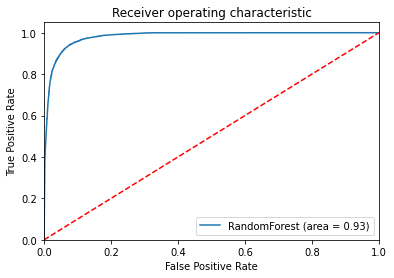

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2),
            'n_estimators':[125,250,500],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

In [0]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.56030455375762
Test Prediction Score 96.01060390534076


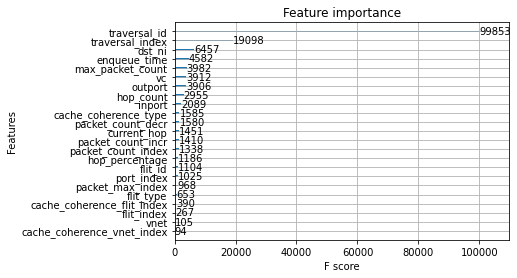

In [0]:
plot_importance(xgbc)
plt.show()

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8239
           1       0.95      0.97      0.96      7227

    accuracy                           0.96     15466
   macro avg       0.96      0.96      0.96     15466
weighted avg       0.96      0.96      0.96     15466



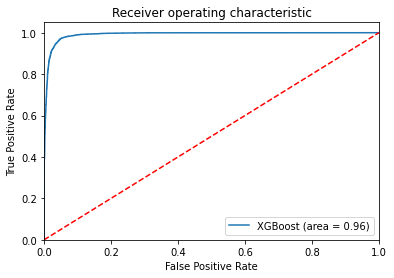

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
param_grid = {'n_estimators': [x for x in range(24,40,2)],
              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
lgb_cv.fit(X_train, y_train)

print("Best parameters:",lgb_cv.best_params_)
print("Accuracy :",lgb_cv.best_score_)

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 91.5811254263591
Test Prediction Score 87.80550885814044


In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5100), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[5486,
 1484,
 1086,
 1066,
 777,
 718,
 655,
 412,
 400,
 356,
 346,
 337,
 313,
 295,
 295,
 260,
 243,
 129,
 97,
 79,
 76,
 59,
 30,
 1,
 0,
 0]

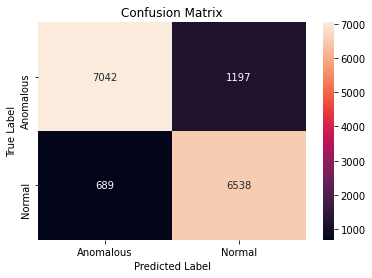

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      8239
           1       0.85      0.90      0.87      7227

    accuracy                           0.88     15466
   macro avg       0.88      0.88      0.88     15466
weighted avg       0.88      0.88      0.88     15466



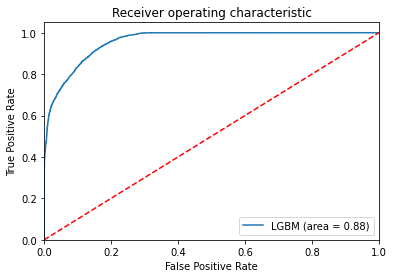

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()